In [1]:
from river import datasets

#in the dataset, all the features except day are normalized
elec = datasets.Elec2() #load dataset

In [2]:
import matplotlib.pyplot as plt
from river import tree, preprocessing, compose, stats
from river.evaluate import progressive_val_score
from river.metrics import Accuracy
import pandas as pd
from sklearn.metrics import f1_score

In [3]:
#look at one sample
x, y = next(iter(elec))
print(x, y)

{'date': 0.0, 'day': 2, 'period': 0.0, 'nswprice': 0.056443, 'nswdemand': 0.439155, 'vicprice': 0.003467, 'vicdemand': 0.422915, 'transfer': 0.414912} True


In [4]:
df = pd.DataFrame((x | {'label': y} for x, y in elec.take(1000)))
print(df.head())

   date  day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0    2  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0    2  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0    2  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0    2  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0    2  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

   label  
0   True  
1   True  
2   True  
3   True  
4  False  


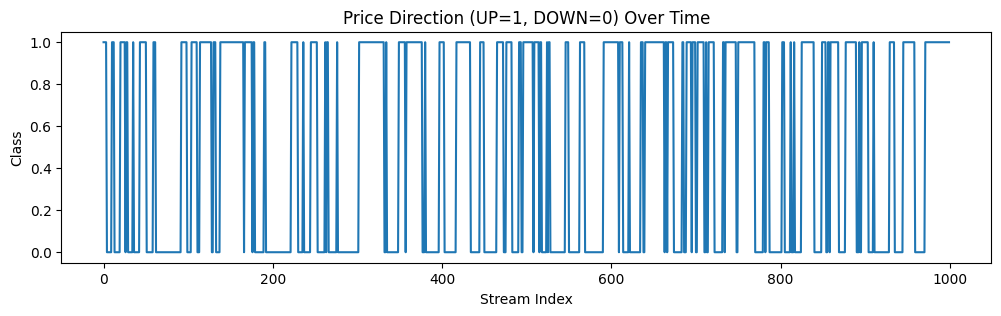

In [5]:
plt.figure(figsize=(12,3))
plt.plot(df.index, df['label'].astype(int))
plt.title("Price Direction (UP=1, DOWN=0) Over Time")
plt.xlabel("Stream Index")
plt.ylabel('Class')
plt.show()

Generating a synthetic stream that micmics the electricity dataset to use as a baseline.

In [6]:
#generating a synthetic stream that micmics the electricity dataset to use as a baseline
from river.datasets import synth

syn_stream = synth.RandomRBFDrift(
    n_classes=2,
    n_features=8,
    n_centroids=30,
    n_drift_centroids=15,
    change_speed=0.0001,
    seed_model=42,
    seed_sample=42
)
#change_speed is set to 0.001 to micmic the long up and down phases in the elec dataset


rows = []
for i, (x, y) in enumerate(syn_stream.take(1000)):
    row = x.copy()       
    row['y'] = y         
    row['t'] = i      
    rows.append(row)

df = pd.DataFrame(rows).set_index('t')

print(df.head())

          0         1         2         3         4         5         6  \
t                                                                         
0  0.370553 -0.034558  0.894524  0.925527  1.035873  1.074798  0.692361   
1  0.368455  0.896439  0.453187  0.248487  0.061095  0.022059  0.557279   
2  0.665597  0.227113  1.090868 -0.060357  0.322763  1.092873  1.055710   
3  0.816490 -0.386625  0.184813  0.811755  0.086882  0.827578  0.221706   
4  0.987059  0.590174  0.550704  0.764953  0.067961  0.600298  0.511821   

          7  y  
t               
0  0.136760  1  
1  0.583220  0  
2 -0.341307  1  
3  0.504505  0  
4  0.847238  0  


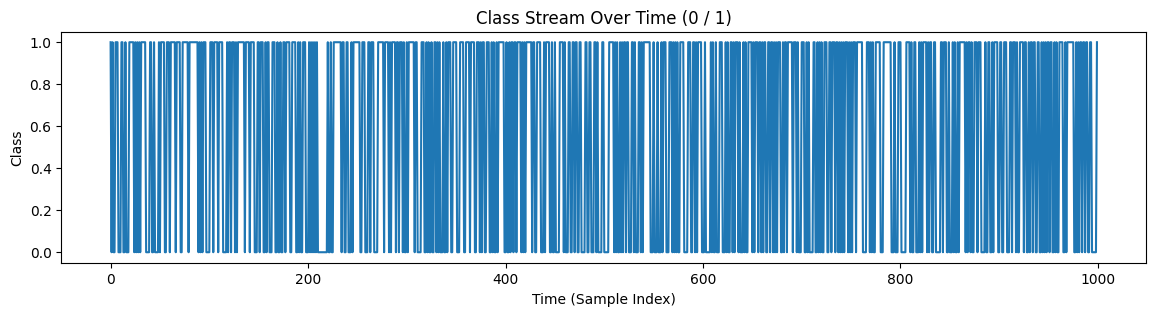

In [7]:
plt.figure(figsize=(14, 3))
plt.plot(df.index, df['y'])
plt.title('Class Stream Over Time (0 / 1)')
plt.xlabel('Time (Sample Index)')
plt.ylabel('Class')
plt.show()

Hoeffding Tree Classifier on Synthetic Dataset

In [8]:
model_ht = tree.HoeffdingTreeClassifier()
metric = Accuracy()

progressive_val_score(dataset=syn_stream.take(50000),
                      model=model_ht,
                      metric=metric,
                      print_every=1000)


[1,000] Accuracy: 71.47%
[2,000] Accuracy: 73.24%
[3,000] Accuracy: 73.62%
[4,000] Accuracy: 74.02%
[5,000] Accuracy: 75.40%
[6,000] Accuracy: 76.80%
[7,000] Accuracy: 76.95%
[8,000] Accuracy: 76.97%
[9,000] Accuracy: 76.96%
[10,000] Accuracy: 76.79%
[11,000] Accuracy: 77.28%
[12,000] Accuracy: 77.72%
[13,000] Accuracy: 78.14%
[14,000] Accuracy: 78.33%
[15,000] Accuracy: 78.44%
[16,000] Accuracy: 78.30%
[17,000] Accuracy: 78.25%
[18,000] Accuracy: 78.03%
[19,000] Accuracy: 77.97%
[20,000] Accuracy: 78.00%
[21,000] Accuracy: 77.98%
[22,000] Accuracy: 77.90%
[23,000] Accuracy: 77.83%
[24,000] Accuracy: 77.86%
[25,000] Accuracy: 77.88%
[26,000] Accuracy: 78.16%
[27,000] Accuracy: 78.34%
[28,000] Accuracy: 78.46%
[29,000] Accuracy: 78.49%
[30,000] Accuracy: 78.45%
[31,000] Accuracy: 78.39%
[32,000] Accuracy: 78.34%
[33,000] Accuracy: 78.38%
[34,000] Accuracy: 78.33%
[35,000] Accuracy: 78.32%
[36,000] Accuracy: 78.32%
[37,000] Accuracy: 78.38%
[38,000] Accuracy: 78.53%
[39,000] Accuracy: 78

Accuracy: 78.67%

Hoeffding Adaptive Tree Classifier on Synthetic Dataset

In [9]:
model_hat = tree.HoeffdingAdaptiveTreeClassifier()
metric = Accuracy()

progressive_val_score(dataset=syn_stream.take(50000),
                      model=model_hat,
                      metric=metric,
                      print_every=1000)

[1,000] Accuracy: 71.47%
[2,000] Accuracy: 73.09%
[3,000] Accuracy: 73.66%
[4,000] Accuracy: 74.89%
[5,000] Accuracy: 76.38%
[6,000] Accuracy: 77.15%
[7,000] Accuracy: 77.00%
[8,000] Accuracy: 77.53%
[9,000] Accuracy: 77.59%
[10,000] Accuracy: 77.78%
[11,000] Accuracy: 78.23%
[12,000] Accuracy: 78.41%
[13,000] Accuracy: 78.57%
[14,000] Accuracy: 78.66%
[15,000] Accuracy: 78.85%
[16,000] Accuracy: 78.82%
[17,000] Accuracy: 79.03%
[18,000] Accuracy: 78.84%
[19,000] Accuracy: 78.84%
[20,000] Accuracy: 78.80%
[21,000] Accuracy: 78.78%
[22,000] Accuracy: 78.92%
[23,000] Accuracy: 79.16%
[24,000] Accuracy: 79.18%
[25,000] Accuracy: 79.22%
[26,000] Accuracy: 79.37%
[27,000] Accuracy: 79.40%
[28,000] Accuracy: 79.40%
[29,000] Accuracy: 79.49%
[30,000] Accuracy: 79.48%
[31,000] Accuracy: 79.56%
[32,000] Accuracy: 79.56%
[33,000] Accuracy: 79.62%
[34,000] Accuracy: 79.58%
[35,000] Accuracy: 79.70%
[36,000] Accuracy: 79.80%
[37,000] Accuracy: 79.88%
[38,000] Accuracy: 79.97%
[39,000] Accuracy: 80

Accuracy: 80.27%

On Electricity Dataset

Hoeffding Tree Classifier on Electricity Dataset

In [10]:
model_ht = tree.HoeffdingTreeClassifier()
metric = Accuracy()

progressive_val_score(dataset=elec,
                      model=model_ht,
                      metric=metric,
                      print_every=1000)

[1,000] Accuracy: 86.39%
[2,000] Accuracy: 85.24%
[3,000] Accuracy: 84.03%
[4,000] Accuracy: 85.12%
[5,000] Accuracy: 84.72%
[6,000] Accuracy: 83.55%
[7,000] Accuracy: 83.71%
[8,000] Accuracy: 83.21%
[9,000] Accuracy: 84.00%
[10,000] Accuracy: 83.99%
[11,000] Accuracy: 84.12%
[12,000] Accuracy: 84.05%
[13,000] Accuracy: 84.01%
[14,000] Accuracy: 84.48%
[15,000] Accuracy: 84.48%
[16,000] Accuracy: 83.87%
[17,000] Accuracy: 83.53%
[18,000] Accuracy: 83.32%
[19,000] Accuracy: 83.39%
[20,000] Accuracy: 82.93%
[21,000] Accuracy: 82.41%
[22,000] Accuracy: 82.62%
[23,000] Accuracy: 82.16%
[24,000] Accuracy: 81.47%
[25,000] Accuracy: 81.36%
[26,000] Accuracy: 81.34%
[27,000] Accuracy: 81.38%
[28,000] Accuracy: 81.12%
[29,000] Accuracy: 80.84%
[30,000] Accuracy: 80.35%
[31,000] Accuracy: 80.44%
[32,000] Accuracy: 80.20%
[33,000] Accuracy: 80.05%
[34,000] Accuracy: 80.17%
[35,000] Accuracy: 79.99%
[36,000] Accuracy: 79.95%
[37,000] Accuracy: 79.83%
[38,000] Accuracy: 79.42%
[39,000] Accuracy: 79

Accuracy: 79.56%

Hoeffding Adaptive Tree Classifier on Electricity Dataset

In [11]:
model_hat = tree.HoeffdingAdaptiveTreeClassifier()
metric = Accuracy()

progressive_val_score(dataset=elec,
                      model=model_hat,
                      metric=metric,
                      print_every=1000)

[1,000] Accuracy: 84.38%
[2,000] Accuracy: 87.34%
[3,000] Accuracy: 86.90%
[4,000] Accuracy: 87.90%
[5,000] Accuracy: 88.40%
[6,000] Accuracy: 87.61%
[7,000] Accuracy: 87.54%
[8,000] Accuracy: 87.04%
[9,000] Accuracy: 87.35%
[10,000] Accuracy: 87.54%
[11,000] Accuracy: 87.84%
[12,000] Accuracy: 87.50%
[13,000] Accuracy: 87.33%
[14,000] Accuracy: 87.48%
[15,000] Accuracy: 87.38%
[16,000] Accuracy: 87.37%
[17,000] Accuracy: 87.02%
[18,000] Accuracy: 86.92%
[19,000] Accuracy: 87.14%
[20,000] Accuracy: 86.44%
[21,000] Accuracy: 86.09%
[22,000] Accuracy: 86.15%
[23,000] Accuracy: 85.90%
[24,000] Accuracy: 85.49%
[25,000] Accuracy: 85.08%
[26,000] Accuracy: 84.76%
[27,000] Accuracy: 84.72%
[28,000] Accuracy: 84.58%
[29,000] Accuracy: 84.40%
[30,000] Accuracy: 84.08%
[31,000] Accuracy: 83.71%
[32,000] Accuracy: 83.59%
[33,000] Accuracy: 83.43%
[34,000] Accuracy: 83.39%
[35,000] Accuracy: 83.30%
[36,000] Accuracy: 83.22%
[37,000] Accuracy: 83.14%
[38,000] Accuracy: 83.06%
[39,000] Accuracy: 83

Accuracy: 83.45%